## Задание №1

В программе ниже дана неразмеченная выборка data_x, задано число кластеров K и инициализированы начальные центры кластеров случайным образом

Выполните кластеризацию выборки data_x алгоритмом Ллойда с метрикой:

$$ρ(x_k, x_m) = \frac {1}{l} \sum_{i=1}^l ∣x_k^i - x_m^i∣$$

Результат кластеризации образов data_x сохраните в списке ``X`` в следующем формате:

$[[(x_1,y_1),...,(x_k,y_k)],...,[(x_1,y_1),...,(x_m,y_m)]] $

То есть, в первом вложенном списке хранятся образы для первого кластера (с центром ma[0]), во втором вложенном списке - образы второго кластера (с центром ma[1]), и так далее. Порядок образов внутри списков может быть произвольным.

In [2]:
import numpy as np

def dist(xk, xm):
    return np.mean(np.abs(xk - xm))

np.random.seed(0)

data_x = [(48, 118), (74, 96), (103, 82), (135, 76), (162, 79), (184, 97), (206, 111), (231, 118), (251, 118), (275, 110), (298, 86), (320, 68), (344, 62), (376, 61), (403, 75), (424, 95), (440, 114), (254, 80), (219, 85), (288, 66), (260, 92), (201, 76), (162, 66), (127, 135), (97, 143), (83, 160), (82, 177), (88, 199), (105, 205), (135, 208), (151, 198), (157, 169), (153, 152), (117, 158), (106, 168), (106, 185), (123, 188), (125, 171), (139, 163), (139, 183), (358, 127), (328, 132), (313, 146), (300, 169), (300, 181), (308, 197), (326, 206), (339, 209), (370, 199), (380, 184), (380, 147), (343, 154), (329, 169), (332, 184), (345, 185), (363, 159), (361, 177), (344, 169), (311, 175), (351, 89), (134, 96)]

M = np.mean(data_x, axis=0)      # вычисление средних по каждой координате
D = np.var(data_x, axis=0)       # вычисление дисперсий по каждой координате
K = 3                       # число кластеров
ma = [np.random.normal(M, np.sqrt(D / 10), 2) for n in range(K)]        # начальные центры кластеров

ma_new = [np.ones(2) for _ in range(K)]

for _ in range(10):
    X = [[] for _ in range(K)]

    for x in data_x:
        cl = np.argmin([dist(x, ma[i]) for i in range(K)])
        X[cl].append(x)
    ma_new = [np.mean(xx, axis=0) for xx in X]
    ma = ma_new

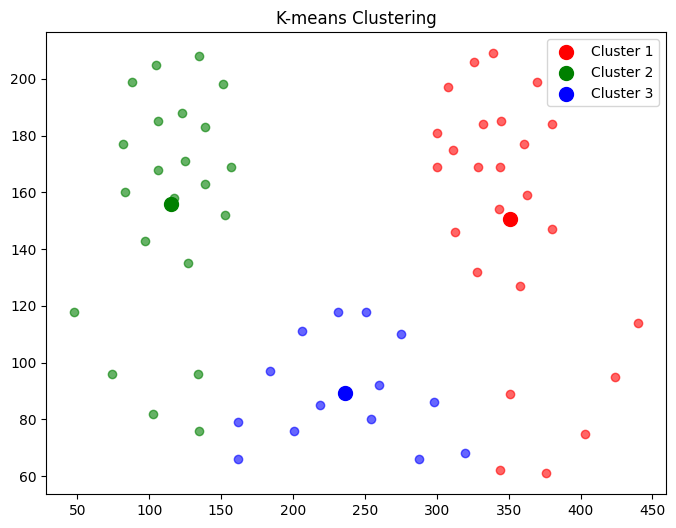

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

colors = ['red', 'green', 'blue']

for i in range(K):
    for clust in enumerate(X[i]):
        plt.scatter(clust[1][0], clust[1][1], color=colors[i], alpha=0.6)

# Рисуем центры кластеров
for i, center in enumerate(ma):
    plt.scatter(center[0], center[1], color=colors[i], marker='o', s=100, label=f'Cluster {i+1}')

plt.title('K-means Clustering')

plt.legend()
plt.show()

## Задание №2

В программе ниже дана размеченная T и неразмеченная data_x выборки и задано число кластеров K

Вычислите начальные центры кластеров по выборке T. Продолжите кластеризацию для неразмеченной выборки data_x алгоритмом Ллойда с метрикой:

$$ρ(x_k, x_m) = \frac {1}{l} \sum_{i=1}^l (x_k^i - x_m^i)^2$$

Результат кластеризации образов T и data_x сохраните в списке X в следующем формате:

$[[(x_1,y_1),...,(x_k,y_k)],...,[(x_1,y_1),...,(x_m,y_m)]] $

То есть, в первом вложенном списке хранятся образы для первого кластера (с центром ma[0]), во втором вложенном списке - образы второго кластера (с центром ma[1]), и так далее. Порядок образов внутри списков может быть произвольным.

In [1]:
import numpy as np

def dist(xk, xm):
    return np.mean((xk - xm) ** 2)

T = [[(365, 200), (390, 180), (350, 172), (400, 171)], [(77, 150), (100, 200), (50, 130)], [(250, 100), (170, 88), (280, 102), (230, 108)]]
data_x = [(48, 118), (74, 96), (103, 82), (135, 76), (162, 79), (184, 97), (206, 111), (231, 118), (251, 118), (275, 110), (298, 86), (320, 68), (344, 62), (376, 61), (403, 75), (424, 95), (440, 114), (254, 80), (219, 85), (288, 66), (260, 92), (201, 76), (162, 66), (127, 135), (97, 143), (83, 160), (82, 177), (88, 199), (105, 205), (135, 208), (151, 198), (157, 169), (153, 152), (117, 158), (106, 168), (106, 185), (123, 188), (125, 171), (139, 163), (139, 183), (358, 127), (328, 132), (313, 146), (300, 169), (300, 181), (308, 197), (326, 206), (339, 209), (370, 199), (380, 184), (380, 147), (343, 154), (329, 169), (332, 184), (345, 185), (363, 159), (361, 177), (344, 169), (311, 175), (351, 89), (134, 96)]

K = 3 

ma = [np.mean(tt, axis=0) for tt in T]

for _ in range(10):
    X = [[] for _ in range(K)]

    for x in data_x:
        cl = np.argmin([dist(x, ma[i]) for i in range(K)])
        X[cl].append(x)
    for i in range(K):
        X[i].extend(T[i])
    ma = [np.mean(xx, axis=0) for xx in X]

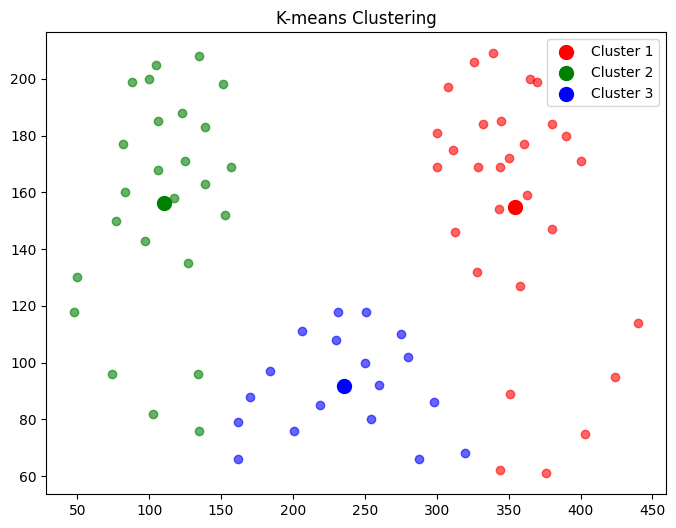

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

colors = ['red', 'green', 'blue']

for i in range(K):
    for clust in enumerate(X[i]):
        plt.scatter(clust[1][0], clust[1][1], color=colors[i], alpha=0.6)

# Рисуем центры кластеров
for i, center in enumerate(ma):
    plt.scatter(center[0], center[1], color=colors[i], marker='o', s=100, label=f'Cluster {i+1}')

plt.title('K-means Clustering')

plt.legend()
plt.show()